# Step 7: Train linear classification model

This model will serve as a benchmark for more complex classification models. The following steps will be covered in this notebook:
1. Setup model and data
2. Train model on data sample
3. Train model on full data set

## Setup model and data

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import keras.backend as K
K.clear_session()

Using TensorFlow backend.


First, we have to load the data and infer input and output dimensions for the model.

In [3]:
from tep.linearModel import classification_model
from tep.config import Config
config = Config()
classes = config.CLASSES
len(classes) + 1

5

In [4]:
from tep.utils import load_array

In [5]:
features = load_array(filename="data/auxiliary_features.bc")
features.shape

(1293005, 15)

In [6]:
labels = load_array(filename="data/classification_labels.bc")
labels.shape

(1293005,)

In [7]:
num_features = features.shape[1]
num_classes = len(classes) + 1

Now, we can create the model...

In [8]:
model = classification_model(input_dim=num_features, output_dim=num_classes)

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalized_inputs (BatchNorm (None, 15)                60        
_________________________________________________________________
output (Dense)               (None, 5)                 80        
Total params: 140
Trainable params: 110
Non-trainable params: 30
_________________________________________________________________


In order to make results and models reproducible, we need to be able to save and load the model architecture from file. Configuration will be saved in json format.

In [10]:
from tep.modelUtils import save_architecture, load_architecture
save_architecture(model, "models/lin_class.json")

## Train model on data sample

In [11]:
# set sample size
train_size = 10000
val_size = 1000

In [12]:
# get useful callback functions
from tep.trainUtils import get_callbacks

In [13]:
model_name = "lin_class"
log_dir = "logs/" + model_name

In [14]:
!mkdir $log_dir

mkdir: logs/lin_class: File exists


In [15]:
callbacks = get_callbacks(model_name=model_name, log_dir=log_dir, verbose=1)

In [16]:
# we have to one-hot encode the labels prior to training
from tep.trainUtils import one_hot_encoding

In [17]:
encoded_labels = one_hot_encoding(class_labels=labels, number_classes=num_classes)
print(labels[:5])
print(encoded_labels[:5])

[ 3.  0.  1.  1.  0.]
[[ 0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]]


In [18]:
# now, we can train the model for the first time
model.fit(features[:train_size], 
          encoded_labels[:train_size], 
          validation_data=(features[-val_size:], encoded_labels[-val_size:]), 
          batch_size=64, 
          epochs=100, 
          verbose=2,
          shuffle=True,
          callbacks=callbacks)

Train on 10000 samples, validate on 1000 samples
Epoch 1/100
Epoch 00001: val_loss improved from inf to 1.54849, saving model to models/lin_class.hdf5
 - 1s - loss: 1.8188 - acc: 0.2594 - val_loss: 1.5485 - val_acc: 0.3500
Epoch 2/100
Epoch 00002: val_loss improved from 1.54849 to 1.33311, saving model to models/lin_class.hdf5
 - 1s - loss: 1.4394 - acc: 0.3940 - val_loss: 1.3331 - val_acc: 0.4520
Epoch 3/100
Epoch 00003: val_loss improved from 1.33311 to 1.25551, saving model to models/lin_class.hdf5
 - 1s - loss: 1.2956 - acc: 0.4662 - val_loss: 1.2555 - val_acc: 0.4830
Epoch 4/100
Epoch 00004: val_loss improved from 1.25551 to 1.21720, saving model to models/lin_class.hdf5
 - 1s - loss: 1.2305 - acc: 0.4910 - val_loss: 1.2172 - val_acc: 0.4910
Epoch 5/100
Epoch 00005: val_loss improved from 1.21720 to 1.19632, saving model to models/lin_class.hdf5
 - 1s - loss: 1.1999 - acc: 0.4921 - val_loss: 1.1963 - val_acc: 0.4930
Epoch 6/100
Epoch 00006: val_loss improved from 1.19632 to 1.1813

In [19]:
callbacks

In [20]:
history = callbacks[2]

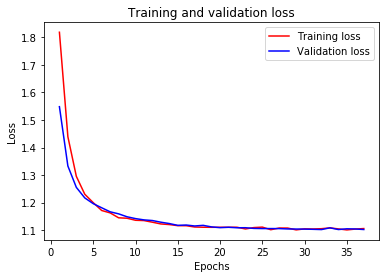

In [21]:
from tep.trainUtils import plot_loss
plot_loss(history)

In [22]:
predictions = model.predict(features[-val_size:])
predictions.shape

(1000, 5)

In [23]:
predictions[:10]

array([[  2.75367975e-01,   4.30068135e-01,   2.33325407e-01,
          5.31381145e-02,   8.10036156e-03],
       [  6.20522976e-01,   2.44799063e-01,   1.00173250e-01,
          2.54571289e-02,   9.04756505e-03],
       [  9.22234297e-01,   5.19122519e-02,   2.50368267e-02,
          3.63024068e-04,   4.53558110e-04],
       [  7.25148261e-01,   2.10511327e-01,   5.21134324e-02,
          9.37751681e-03,   2.84950342e-03],
       [  4.50563133e-01,   3.69561166e-01,   1.70339912e-01,
          7.05762766e-03,   2.47810548e-03],
       [  1.29370600e-01,   5.00576735e-01,   2.74504811e-01,
          8.64520743e-02,   9.09586344e-03],
       [  4.94566590e-01,   3.41590106e-01,   1.56881303e-01,
          5.70081174e-03,   1.26116269e-03],
       [  4.87667054e-01,   2.79593229e-01,   1.68575287e-01,
          4.68220823e-02,   1.73423216e-02],
       [  3.19817632e-01,   4.43717778e-01,   1.64712355e-01,
          6.11711591e-02,   1.05811032e-02],
       [  2.48952940e-01,   3.0462703

In [24]:
from tep.trainUtils import one_hot_to_class
predictions = one_hot_to_class(predictions)
predictions[:10]

array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.])

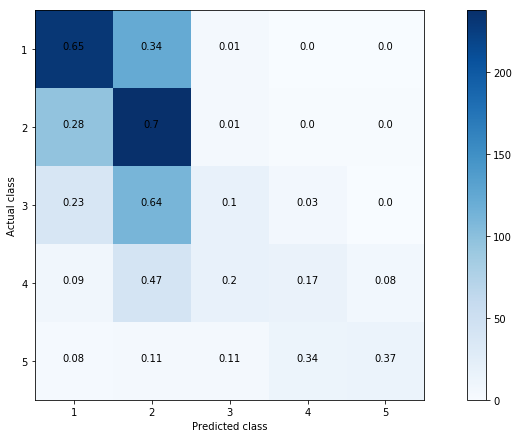

In [25]:
from tep.trainUtils import plot_cm
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
actuals = labels[-val_size:]
plot_cm(predictions, actuals, np.arange(1, 6), normalize=True)